## Data Preparation
- loading the raw data
- loading the annotated data 
- checking annotation success (no duplicates, no altered measurements)
- correlation analysis

In [2]:
import pandas as pd

### Loading and preparing RNA file

In [3]:
#loading RNA Quant file data
RNA_geneQuant_df = pd.read_csv('HepG2_data/HepG2_DNAm/ENCFF649XOG.tsv', sep='\t', header=0)
display(RNA_geneQuant_df)

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
0,10904,10904,93.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12954,12954,94.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12956,12956,72.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12958,12958,82.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12960,12960,73.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59521,gSpikein_ERCC-00165,tSpikein_ERCC-00165,872.0,700.78,87.0,4.47,8.43,87.0,0.0,4.33,8.42,3.439680,5.244820,0.071704,6.672670,10.182700,0.071661
59522,gSpikein_ERCC-00168,tSpikein_ERCC-00168,1024.0,852.78,1.0,0.04,0.08,1.0,0.0,0.08,0.16,0.002566,0.194005,0.474234,0.005171,0.377749,0.474374
59523,gSpikein_ERCC-00170,tSpikein_ERCC-00170,1023.0,851.78,51.0,2.16,4.07,51.0,0.0,2.10,4.09,1.548640,2.687830,0.093629,3.011470,5.228390,0.093579
59524,gSpikein_ERCC-00171,tSpikein_ERCC-00171,505.0,333.85,3942.0,425.45,802.16,3942.0,0.0,406.87,791.53,394.250000,419.834000,0.010739,767.089000,816.791000,0.010720


In [5]:
# filter rna rows to include only the genes
rna_genes = RNA_geneQuant_df.loc[RNA_geneQuant_df['gene_id'].str.contains("ENS")]
display(rna_genes)

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
649,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2179.14,2007.92,2019.00,36.23,68.31,2019.00,0.00,34.91,67.91,3.334520e+01,36.533100,0.015839,6.478720e+01,70.974500,0.015831
650,ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",940.50,769.31,0.00,0.00,0.00,0.00,0.00,0.12,0.24,1.760980e-03,0.313410,0.511119,3.288750e-03,0.609651,0.511279
651,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1078.03,906.82,887.00,35.24,66.45,887.00,0.00,34.27,66.67,3.199170e+01,36.595700,0.023183,6.222900e+01,71.169600,0.023156
652,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",3488.94,3317.73,258.00,2.80,5.28,258.00,0.00,2.79,5.43,2.313660e+00,3.287400,0.060300,4.505810e+00,6.399090,0.060332
653,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",2911.75,2740.54,879.00,11.56,21.79,879.00,0.00,11.50,22.37,1.024230e+01,12.846600,0.039000,1.991680e+01,24.984000,0.038972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59424,ENSG00000285990.1,ENST00000649331.1,647.00,475.81,0.75,0.06,0.11,1.80,1.60,0.20,0.39,5.294150e-06,0.530734,0.602857,1.030280e-05,1.032140,0.602870
59425,ENSG00000285991.1,ENST00000647612.1,5065.00,4893.78,14.93,0.11,0.21,17.18,5.91,0.13,0.25,4.175390e-02,0.234562,0.266380,7.841970e-02,0.453671,0.266300
59426,ENSG00000285992.1,ENST00000648949.1,956.00,784.78,0.00,0.00,0.00,0.00,0.00,0.04,0.09,1.021180e-06,0.131430,0.654743,2.449570e-06,0.255766,0.654939
59427,ENSG00000285993.1,ENST00000650266.1,1246.00,1074.78,0.00,0.00,0.00,0.00,0.00,0.03,0.06,2.000310e-06,0.095424,0.654978,3.892870e-06,0.185655,0.655171


In [9]:
# each row = 1 gene (already aggregated) so selecting necessary columns

rna_genes_expected_count = rna_genes[['gene_id', 'expected_count']]
display(rna_genes_expected_count)

,gene_id,expected_count
649,ENSG00000000003.14,2019.00
650,ENSG00000000005.5,0.00
651,ENSG00000000419.12,887.00
652,ENSG00000000457.13,258.00
653,ENSG00000000460.16,879.00
...,...,...
59424,ENSG00000285990.1,0.75
59425,ENSG00000285991.1,14.93
59426,ENSG00000285992.1,0.00
59427,ENSG00000285993.1,0.00


### Loading and preparing histone Pseudreplicated Peak file

Likely columns:
- chromosome
- start of peak
- end of peak
- peak id
- length of peak in base pairs
- strand (NA here)
- [6,7,8,9] unsure

Each row = unique peak

In [11]:
# loading pseudoreplicated peak files
histone_peaks_K9_df = pd.read_csv('HepG2_data/HepG2_histone/processed/ENCFF170GMN.bed', sep='\t', header=None)
histone_peaks_K27_df = pd.read_csv('HepG2_data/HepG2_histone/processed/ENCFF841QVP.bed', sep='\t', header=None)

display(histone_peaks_K9_df)
display(histone_peaks_K27_df)

,0,1,2,3,4,5,6,7,8,9
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635
1,chr1,991782,992368,Peak_49693,167,.,5.23056,16.71326,14.64974,235
2,chr1,1112984,1113962,Peak_13060,297,.,7.35106,29.75177,27.03791,471
3,chr1,1194302,1195375,Peak_6971,362,.,8.27128,36.28568,33.31710,650
4,chr1,1770030,1770624,Peak_107498,98,.,3.79372,9.87359,8.21870,315
...,...,...,...,...,...,...,...,...,...,...
148025,chrY,26667979,26668865,Peak_48031,172,.,4.20870,17.27292,15.19134,673
148026,chrY,26668976,26671930,Peak_4,1000,.,6.71736,200.44463,194.12437,2116
148027,chrY,26672410,26672736,Peak_91129,112,.,3.60158,11.25807,9.52160,94
148028,chrY,56679663,56680112,Peak_60182,151,.,4.94783,15.15114,13.17521,124


,0,1,2,3,4,5,6,7,8,9
0,chr1,100236060,100236175,Peak_91116,33,.,3.38068,3.39518,0.84457,88
1,chr1,100538099,100538408,Peak_9577,65,.,5.03472,6.59658,2.72930,79
2,chr1,101135095,101135210,Peak_97001,32,.,3.29575,3.26597,0.83925,47
3,chr1,101236811,101237102,Peak_17149,61,.,4.77464,6.16004,2.57973,107
4,chr1,101237336,101237500,Peak_87875,36,.,3.27881,3.62443,1.03439,55
...,...,...,...,...,...,...,...,...,...,...
51278,chrX,848527,848652,Peak_65447,43,.,3.93203,4.39984,1.48232,36
51279,chrX,8742048,8742163,Peak_65448,43,.,3.93203,4.39984,1.48232,26
51280,chrX,915821,915961,Peak_5605,77,.,6.13741,7.77377,3.56466,85
51281,chrX,9295740,9295902,Peak_31774,54,.,4.48337,5.46977,2.10106,87


In [17]:
# checking for duplicate rows
# K9 = 148030 rows, K27 = 51283 rows
# no duplicates - each row is a unique peak

duplicate_test_K9 = histone_peaks_K9_df.groupby(histone_peaks_K9_df[3]).sum()
print(duplicate_test_K9.shape)

duplicate_test_K27 = histone_peaks_K27_df.groupby(histone_peaks_K27_df[3]).sum()
print(duplicate_test_K27.shape)

(148030, 7)
(51283, 7)


C:\Users\julia\AppData\Local\Temp\ipykernel_5828\588033191.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duplicate_test_K9 = histone_peaks_K9_df.groupby(histone_peaks_K9_df[3]).sum()
C:\Users\julia\AppData\Local\Temp\ipykernel_5828\588033191.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duplicate_test_K27 = histone_peaks_K27_df.groupby(histone_peaks_K27_df[3]).sum()


In [32]:
# first attempt at annotation resulting in duplicated rows

h3k9me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/H3K9me3_pp_annotations.bed', sep='\t', header=None, nrows=1000000)
h3k27me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/H3K27me3_pp_annotations.bed', sep='\t', header=None, nrows=1000000)
display(h3k9me3_pp_annotated_df)
display(h3k27me3_pp_annotated_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,586071,827796,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans..."
1,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,594308,827796,.,-,.,"gene_id ""ENSG00000230021.10""; transcript_id ""E..."
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,778770,810060,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN..."
3,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,779056,804875,.,+,.,"gene_id ""ENSG00000237491.8""; transcript_id ""EN..."
4,chr1,1112984,1113962,Peak_13060,297,.,7.35106,29.75177,27.03791,471,chr1,HAVANA,gene,1081818,1116361,.,-,.,"gene_id ""ENSG00000131591.17""; gene_type ""prote..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210848,chrY,26618172,26618975,Peak_136047,81,.,3.53416,8.12781,6.56647,650,chrY,HAVANA,transcript,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; transcript_id ""EN..."
210849,chrY,26622758,26623232,Peak_148094,75,.,3.39280,7.50822,5.98529,162,chrY,HAVANA,gene,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc..."
210850,chrY,26622758,26623232,Peak_148094,75,.,3.39280,7.50822,5.98529,162,chrY,HAVANA,transcript,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; transcript_id ""EN..."
210851,chrY,26629403,26630135,Peak_211236,52,.,2.82733,5.20947,3.84296,493,chrY,HAVANA,gene,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc..."


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,exon,870086,870201,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
1,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,gene,868071,876903,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN..."
2,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,transcript,868071,876903,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
3,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,transcript,868240,870201,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
4,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,873292,874349,.,+,.,"gene_id ""ENSG00000234711.1""; gene_type ""unproc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378587,chrX,154749644,154750706,Peak_6511,177,.,5.58190,17.74918,14.40437,833,chrX,HAVANA,gene,154675249,154751583,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote..."
378588,chrX,154749644,154750706,Peak_6511,177,.,5.58190,17.74918,14.40437,833,chrX,HAVANA,transcript,154675253,154751057,.,-,.,"gene_id ""ENSG00000160219.11""; transcript_id ""E..."
378589,chrX,154749644,154750706,Peak_6511,177,.,5.58190,17.74918,14.40437,833,chrX,HAVANA,transcript,154677966,154751077,.,-,.,"gene_id ""ENSG00000160219.11""; transcript_id ""E..."
378590,chrX,154751366,154752349,Peak_22135,122,.,4.52586,12.26981,9.50141,201,chrX,HAVANA,gene,154675249,154751583,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote..."


In [47]:
h3k9me3_pp_annotated_gene_df = h3k9me3_pp_annotated_df[h3k9me3_pp_annotated_df[12] == 'gene']
h3k27me3_pp_annotated_gene_df = h3k27me3_pp_annotated_df[h3k27me3_pp_annotated_df[12] == 'gene']
pattern = r'gene_id\s*"([^"]+)"'
h3k9me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k9me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)
h3k27me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k27me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)

display(h3k9me3_pp_annotated_gene_df)
display(h3k27me3_pp_annotated_gene_df)

C:\Users\julia\AppData\Local\Temp\ipykernel_5828\3369651668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3k9me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k9me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)
C:\Users\julia\AppData\Local\Temp\ipykernel_5828\3369651668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3k27me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k27me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,gene_id
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,586071,827796,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans...",ENSG00000230021.10
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,778770,810060,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN...",ENSG00000237491.8
4,chr1,1112984,1113962,Peak_13060,297,.,7.35106,29.75177,27.03791,471,chr1,HAVANA,gene,1081818,1116361,.,-,.,"gene_id ""ENSG00000131591.17""; gene_type ""prote...",ENSG00000131591.17
7,chr1,1194302,1195375,Peak_6971,362,.,8.27128,36.28568,33.31710,650,chr1,HAVANA,gene,1173884,1197935,.,+,.,"gene_id ""ENSG00000162571.13""; gene_type ""prote...",ENSG00000162571.13
10,chr1,1770030,1770624,Peak_107498,98,.,3.79372,9.87359,8.21870,315,chr1,HAVANA,gene,1751232,1780457,.,-,.,"gene_id ""ENSG00000008130.15""; gene_type ""prote...",ENSG00000008130.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210843,chrY,26521806,26522433,Peak_148093,75,.,3.39280,7.50822,5.98529,453,chrY,HAVANA,gene,26508213,26579690,.,+,.,"gene_id ""ENSG00000215506.5""; gene_type ""unproc...",ENSG00000215506.5
210845,chrY,26544065,26544614,Peak_125146,87,.,3.67553,8.76403,7.16354,334,chrY,HAVANA,gene,26508213,26579690,.,+,.,"gene_id ""ENSG00000215506.5""; gene_type ""unproc...",ENSG00000215506.5
210847,chrY,26618172,26618975,Peak_136047,81,.,3.53416,8.12781,6.56647,650,chrY,HAVANA,gene,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc...",ENSG00000237917.1
210849,chrY,26622758,26623232,Peak_148094,75,.,3.39280,7.50822,5.98529,162,chrY,HAVANA,gene,26594851,26634652,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc...",ENSG00000237917.1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,gene_id
1,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,gene,868071,876903,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN...",ENSG00000230368.2
4,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,873292,874349,.,+,.,"gene_id ""ENSG00000234711.1""; gene_type ""unproc...",ENSG00000234711.1
7,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,868071,876903,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN...",ENSG00000230368.2
10,chr1,874041,874683,Peak_25517,115,.,4.37500,11.53994,8.85712,484,chr1,HAVANA,gene,873292,874349,.,+,.,"gene_id ""ENSG00000234711.1""; gene_type ""unproc...",ENSG00000234711.1
13,chr1,874041,874683,Peak_25517,115,.,4.37500,11.53994,8.85712,484,chr1,HAVANA,gene,874529,877234,.,-,.,"gene_id ""ENSG00000283040.1""; gene_type ""transc...",ENSG00000283040.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378582,chrX,154333683,154334282,Peak_39373,101,.,4.07328,10.12414,7.60838,222,chrX,HAVANA,gene,154333960,154335037,.,-,.,"gene_id ""ENSG00000231830.1""; gene_type ""antise...",ENSG00000231830.1
378585,chrX,154334477,154334992,Peak_161334,56,.,3.01724,5.68958,3.77390,355,chrX,HAVANA,gene,154333960,154335037,.,-,.,"gene_id ""ENSG00000231830.1""; gene_type ""antise...",ENSG00000231830.1
378587,chrX,154749644,154750706,Peak_6511,177,.,5.58190,17.74918,14.40437,833,chrX,HAVANA,gene,154675249,154751583,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote...",ENSG00000160219.11
378590,chrX,154751366,154752349,Peak_22135,122,.,4.52586,12.26981,9.50141,201,chrX,HAVANA,gene,154675249,154751583,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote...",ENSG00000160219.11


**Note**: In the above annotated file, we have peaks that overlap genes (see example Peak_33943) below. Continuing with the assumption tha we will group by gene and aggregate regardless.

In [48]:
# example of peak overlapping gene - should I alter assumptions about aggregating this?
display(h3k9me3_pp_annotated_gene_df[0:2])

for value in h3k9me3_pp_annotated_gene_df.iloc[0:2, 18]:
    print(value)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,gene_id
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,586071,827796,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans...",ENSG00000230021.10
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,778770,810060,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN...",ENSG00000237491.8


gene_id "ENSG00000230021.10"; gene_type "transcribed_processed_pseudogene"; gene_name "AL669831.3"; level 2; havana_gene "OTTHUMG00000191652.4";
gene_id "ENSG00000237491.8"; gene_type "lincRNA"; gene_name "AL669831.5"; level 2; havana_gene "OTTHUMG00000002404.7";


In [53]:
k9_peaks_per_gene = h3k9me3_pp_annotated_gene_df.groupby('gene_id').size().reset_index(name='k9_peak_count')
k27_peaks_per_gene = h3k27me3_pp_annotated_gene_df.groupby('gene_id').size().reset_index(name='k27_peak_count')
display(k9_peaks_per_gene)
display(k27_peaks_per_gene)

,gene_id,k9_peak_count
0,ENSG00000000457.13,1
1,ENSG00000000460.16,1
2,ENSG00000000971.15,6
3,ENSG00000001084.12,5
4,ENSG00000001629.9,3
...,...,...
8451,ENSG00000285978.1,7
8452,ENSG00000285981.1,2
8453,ENSG00000285986.1,1
8454,ENSG00000285987.1,5


,gene_id,k27_peak_count
0,ENSG00000000460.16,4
1,ENSG00000000938.12,7
2,ENSG00000001626.15,3
3,ENSG00000002079.14,5
4,ENSG00000002726.20,11
...,...,...
12773,ENSG00000285987.1,8
12774,ENSG00000285988.1,4
12775,ENSG00000285991.1,10
12776,ENSG00000285993.1,1


### Loading and preparing WGBS data

**Experiencing issues with memory. Will likely need to utilise Kaya. When annotation does work, it impacts the pct methylation column and I'm not sure why.**

In [54]:
# demonstrating issue with annotation

wgbs_df = pd.read_csv('HepG2_data/HepG2_DNAm/processed/ENCFF690FNR.bed', sep='\t', header=None, nrows = 100)
wgbs_annotated_df = pd.read_csv('HepG2_data/HepG2_DNAm/annotated/wgbs_with_gene_annotations.bed', sep='\t', header=None, nrows=100)
wgbs_annotated_df = wgbs_annotated_df[wgbs_annotated_df[16] == 'gene']

display(wgbs_df)
display(wgbs_df.iloc[0:5, 10 ])
display(wgbs_annotated_df.iloc[0:5, 10 ])
display(wgbs_annotated_df.iloc[0:10])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr1,10468,10469,1,1,+,10468,10469,"0,255,0",1,0,CG,MG,3
1,chr1,10469,10470,1,4,-,10469,10470,"155,255,0",4,25,CG,CK,5
2,chr1,10470,10471,1,1,+,10470,10471,"255,0,0",1,100,CG,CG,11
3,chr1,10471,10472,1,2,-,10471,10472,"255,0,0",2,100,CG,CG,6
4,chr1,10483,10484,1,1,+,10483,10484,"255,0,0",1,100,CG,CG,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,chr1,54648,54649,1,1,+,54648,54649,"0,255,0",1,0,CG,CG,22
96,chr1,54649,54650,1,8,-,54649,54650,"0,255,0",8,0,CG,CG,5
97,chr1,56297,56298,1,1,+,56297,56298,"0,255,0",1,0,CG,CG,37
98,chr1,56298,56299,1,12,-,56298,56299,"0,255,0",12,0,CG,CG,5


0      0
1     25
2    100
3    100
4    100
Name: 10, dtype: int64

0    100
2    100
4    100
6    100
8    100
Name: 10, dtype: int64

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,chr1,14709,14710,1,1,+,14709,14710,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
2,chr1,14715,14716,1,1,+,14715,14716,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
4,chr1,14740,14741,1,1,+,14740,14741,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
6,chr1,14746,14747,1,1,+,14746,14747,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
8,chr1,14772,14773,1,1,+,14772,14773,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
10,chr1,14774,14775,1,1,+,14774,14775,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
12,chr1,14790,14791,1,1,+,14790,14791,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
14,chr1,15643,15644,1,1,-,15643,15644,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
16,chr1,16243,16244,1,1,-,16243,16244,"255,0,0",1,...,2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
18,chr1,16554,16555,1,7,+,16554,16555,"255,55,0",7,...,10,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."


In [14]:
# alternative attempt usig a simplified annotation file
annotations = pd.read_csv('HepG2_data/RefGenomes/simplified_gencode_genes.bed', sep='\t', header=None)
print(annotations.shape)



display(annotations)

(58721, 5)


,0,1,2,3,4
0,chr1,11868,14409,+,ENSG00000223972.5
1,chr1,14403,29570,-,ENSG00000227232.5
2,chr1,17368,17436,-,ENSG00000278267.1
3,chr1,29553,31109,+,ENSG00000243485.5
4,chr1,30365,30503,+,ENSG00000284332.1
...,...,...,...,...,...
58716,chrM,14148,14673,-,ENSG00000198695.2
58717,chrM,14673,14742,-,ENSG00000210194.1
58718,chrM,14746,15887,+,ENSG00000198727.2
58719,chrM,15887,15953,+,ENSG00000210195.2


In [5]:
wgbs_data_df = pd.read_csv('HepG2_data/HepG2_DNAm/processed/ENCFF690FNR.bed', sep='\t', header=None)


In [13]:
display(wgbs_data_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr1,10468,10469,1,1,+,10468,10469,"0,255,0",1,0,CG,MG,3
1,chr1,10469,10470,1,4,-,10469,10470,"155,255,0",4,25,CG,CK,5
2,chr1,10470,10471,1,1,+,10470,10471,"255,0,0",1,100,CG,CG,11
3,chr1,10471,10472,1,2,-,10471,10472,"255,0,0",2,100,CG,CG,6
4,chr1,10483,10484,1,1,+,10483,10484,"255,0,0",1,100,CG,CG,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51350653,chrY_KI270740v1_random,35645,35646,1,1,+,35645,35646,"0,255,0",1,0,CG,CG,3
51350654,chrY_KI270740v1_random,35646,35647,1,1,-,35646,35647,"0,255,0",1,0,CG,CG,3
51350655,chrY_KI270740v1_random,35685,35686,1,1,+,35685,35686,"0,255,0",1,0,CG,CG,3
51350656,chrY_KI270740v1_random,35686,35687,1,1,-,35686,35687,"0,255,0",1,0,CG,CG,3


In [16]:
import pandas as pd

# get relevant wgbs columns
wgbs_cut_df = wgbs_data_df.iloc[:, 0:11]
wgbs_cut_df.columns = ['chr', 'start', 'end', 'unknown1', 'score', 'strand', 'start_thick', 'end_thick', 'rgb', 'coverage', 'pct_methylation']

# label annotations
annotations.columns = ['chr', 'start', 'end', 'strand', 'gene_id']

# ensure 'start' and 'end' columns are integers
wgbs_cut_df[['start', 'end']] = wgbs_cut_df[['start', 'end']].apply(pd.to_numeric)
annotations[['start', 'end']] = annotations[['start', 'end']].apply(pd.to_numeric)


- apply our function along the row axis of the dataframe (applied to each row)
- lambda row processes each row
- function returns true if the wgbs file and annotation file have the same chr, the wgbs start is less than the gene end and the gene start is less than the wgbs end
- if true, place gene id in a list
- list gets assigned to the gene_id variable for each row

In [18]:
#  check for overlap
def is_overlap(row, anno):
    return row['chr'] == anno['chr'] and row['start'] <= anno['end'] and anno['start'] <= row['end']

# merge data
wgbs_cut_df['gene_id'] = wgbs_cut_df.apply(lambda row: annotations[annotations.apply(lambda anno: is_overlap(row, anno), axis=1)].gene_id.tolist(), axis=1)


KeyboardInterrupt: 

## merging data

Utilising RNA expression data (expected counts per gene) and histone modification (peak counts per gene) to perform a sense check

In [55]:
# setting index to gene
k9_peaks_per_gene_idx = k9_peaks_per_gene.set_index('gene_id')
k27_peaks_per_gene_idx = k27_peaks_per_gene.set_index('gene_id')
rna_genes_expected_count_idx = rna_genes_expected_count.set_index('gene_id')
display(k9_peaks_per_gene_idx)

,k9_peak_count
gene_id,
ENSG00000000457.13,1
ENSG00000000460.16,1
ENSG00000000971.15,6
ENSG00000001084.12,5
ENSG00000001629.9,3
...,...
ENSG00000285978.1,7
ENSG00000285981.1,2
ENSG00000285986.1,1


In [63]:
# ASSUMPTION: utilising RNA table for a left join base table, and joining on histone mods where applicable and placig a zero (no peaks) where genes are no present in dataset

rna_histone_mods_merged_df = rna_genes_expected_count_idx.merge(k9_peaks_per_gene_idx, how = 'left', left_index=True, right_index=True)\
                            .merge(k27_peaks_per_gene_idx,how = 'left', left_index=True, right_index=True)
display(rna_histone_mods_merged_df)
rna_histone_mods_merged_df['k9_peak_count'].fillna(0, inplace=True)
rna_histone_mods_merged_df['k27_peak_count'].fillna(0, inplace=True)
display(rna_histone_mods_merged_df)


,expected_count,k9_peak_count,k27_peak_count
gene_id,,,
ENSG00000000003.14,2019.00,NaN,NaN
ENSG00000000005.5,0.00,NaN,NaN
ENSG00000000419.12,887.00,NaN,NaN
ENSG00000000457.13,258.00,1.0,NaN
ENSG00000000460.16,879.00,1.0,4.0
...,...,...,...
ENSG00000285990.1,0.75,NaN,NaN
ENSG00000285991.1,14.93,NaN,10.0
ENSG00000285992.1,0.00,NaN,NaN


,expected_count,k9_peak_count,k27_peak_count
gene_id,,,
ENSG00000000003.14,2019.00,0.0,0.0
ENSG00000000005.5,0.00,0.0,0.0
ENSG00000000419.12,887.00,0.0,0.0
ENSG00000000457.13,258.00,1.0,0.0
ENSG00000000460.16,879.00,1.0,4.0
...,...,...,...
ENSG00000285990.1,0.75,0.0,0.0
ENSG00000285991.1,14.93,0.0,10.0
ENSG00000285992.1,0.00,0.0,0.0


In [66]:
#check that all gene_ids in K9 and K27 tables are accounted for in merged table

gene_ids_k9 = set(k9_peaks_per_gene_idx.index)
gene_ids_k27 = set(k27_peaks_per_gene_idx.index)
merged_gene_ids = set(rna_histone_mods_merged_df.index)
unmatched_k9 = gene_ids_k9 - merged_gene_ids
unmatched_k27 =  gene_ids_k27 - merged_gene_ids
print("Gene IDs in merged table not found in K9 histone table:", unmatched_k9)
print("Gene IDs in merged table not found in K27 histone table:", unmatched_k27)

Gene IDs in merged table not found in K9 histone table: set()
Gene IDs in merged table not found in K27 histone table: set()


### Correlation analysis

In [69]:
from scipy.stats import pearsonr, spearmanr, kendalltau

#  Pearson correlation (linear)
pearson_corr_k9, _ = pearsonr(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k9_peak_count'])
pearson_corr_k27, _ = pearsonr(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Pearson Correlation for k9:', pearson_corr_k9,
      '\nPearson Correlation for k27:', pearson_corr_k27)

#  Spearman correlation
spearman_corr_k9, _ = spearmanr(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k9_peak_count'])
spearman_corr_k27, _ = spearmanr(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Spearman Correlation for k9:', spearman_corr_k9,
      '\nSpearman Correlation for k27:', spearman_corr_k27)

#  Kendall Tau correlation
kendall_corr_k9, _ = kendalltau(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k9_peak_count'])
kendall_corr_k27, _ = kendalltau(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Kendall Tau Correlation:', kendall_corr_k9,
      '\nKendall Correlation for k27:', kendall_corr_k27)

Pearson Correlation for k9: -0.00331892540523156 
Pearson Correlation for k27: -0.01012060745925879
Spearman Correlation for k9: 0.06562254716209616 
Spearman Correlation for k27: -0.07437959722112629
Kendall Tau Correlation: 0.05803691591558233 
Kendall Correlation for k27: -0.0641233208429206


Correlation appears very weak (especially for that of linear correlations). Would a model be significantly better (to what extent)?

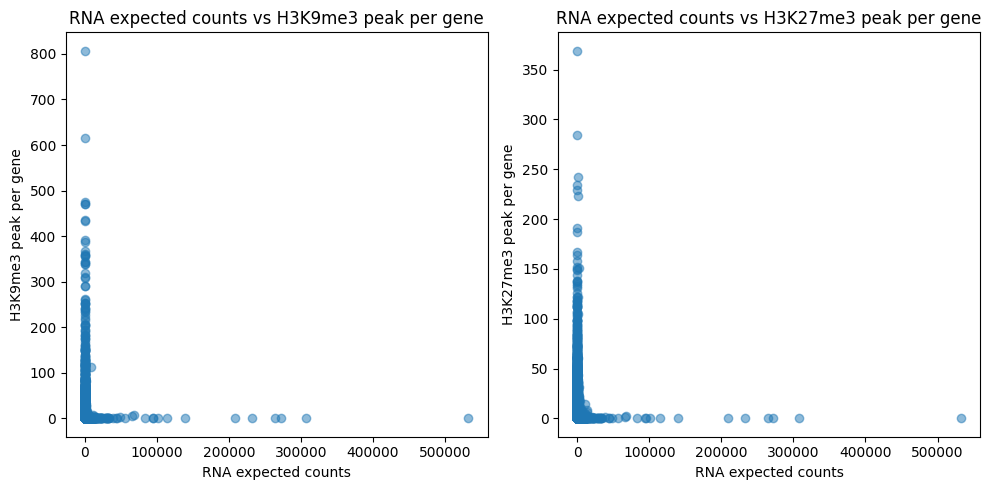

In [75]:
import matplotlib.pyplot as plt

# scatter plot for RNA expression vs. K9 Count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k9_peak_count'], alpha=0.5)
plt.title('RNA expected counts vs H3K9me3 peak per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('H3K9me3 peak per gene')

# scatter plot for expression  vs. K27 Count
plt.subplot(1, 2, 2)
plt.scatter(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k27_peak_count'], alpha=0.5)
plt.title('RNA expected counts vs H3K27me3 peak per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('H3K27me3 peak per gene')

plt.tight_layout()
plt.show()


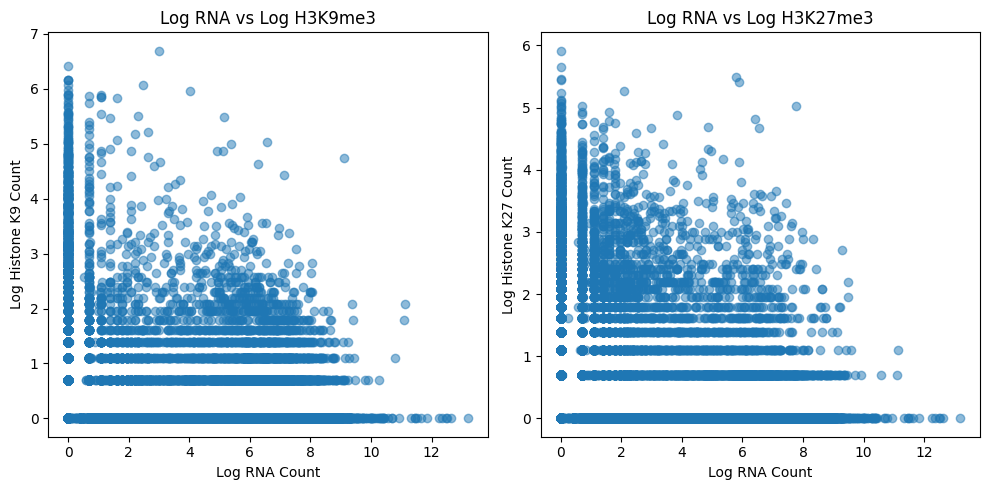

In [77]:
# attempting to scale

import numpy as np
import matplotlib.pyplot as plt


# small constant to avoid log(0) 
expected_count_log = np.log(rna_histone_mods_merged_df['expected_count'] + 1)
k9_peak_count_log = np.log(rna_histone_mods_merged_df['k9_peak_count'] + 1)
k27_peak_count_log = np.log(rna_histone_mods_merged_df['k27_peak_count'] + 1)

# plot the log-transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(expected_count_log, k9_peak_count_log, alpha=0.5)
plt.title('Log RNA vs Log H3K9me3')
plt.xlabel('Log RNA Count')
plt.ylabel('Log Histone K9 Count')

plt.subplot(1, 2, 2)
plt.scatter(expected_count_log, k27_peak_count_log, alpha=0.5)
plt.title('Log RNA vs Log H3K27me3')
plt.xlabel('Log RNA Count')
plt.ylabel('Log Histone K27 Count')

plt.tight_layout()
plt.show()


Still no clear trends (relationships too complex for this method)

In [78]:
# attempting to recalc correlation coefficients with log-transformed data

#  Pearson correlation (linear)
pearson_corr_k9_log, _ = pearsonr(expected_count_log, k9_peak_count_log)
pearson_corr_k27_log, _ = pearsonr(expected_count_log, k27_peak_count_log)

print('Pearson Correlation for k9:', pearson_corr_k9_log,
      '\nPearson Correlation for k27:', pearson_corr_k27_log)

#  Spearman correlation
spearman_corr_k9_log, _ = spearmanr(expected_count_log, k9_peak_count_log)
spearman_corr_k27_log, _ = spearmanr(expected_count_log, k27_peak_count_log)

print('Spearman Correlation for k9:', spearman_corr_k9_log,
      '\nSpearman Correlation for k27:', spearman_corr_k27_log)

#  Kendall Tau correlation
kendall_corr_k9_log, _ = kendalltau(expected_count_log, k9_peak_count_log)
kendall_corr_k27_log, _ = kendalltau(expected_count_log, k27_peak_count_log)

print('Kendall Tau Correlation:', kendall_corr_k9_log,
      '\nKendall Correlation for k27:', kendall_corr_k27_log)

Pearson Correlation for k9: 0.036989832850623246 
Pearson Correlation for k27: -0.09890874216345635
Spearman Correlation for k9: 0.06562254716209616 
Spearman Correlation for k27: -0.07437959722112629
Kendall Tau Correlation: 0.05803691591558233 
Kendall Correlation for k27: -0.0641233208429206


slightly better for pearson (due to log transform - making slightly more linear)